<a href="https://colab.research.google.com/github/NSR9/Extensive-Vision-AI/blob/main/Assignment_4/Model_training/Session_4_assignment_NB_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, padding = 1) #28, 28
        self.conv1_bn = nn.BatchNorm2d(6) 
        self.dropout1 = nn.Dropout2d(0.1)

        self.conv2 = nn.Conv2d(6, 12, 3, padding = 1) #28, 28
        self.conv2_bn = nn.BatchNorm2d(12)
        self.dropout2 = nn.Dropout2d(0.1)

        self.conv9 = nn.Conv2d(12, 24, 3, padding = 1) #28, 28
        self.conv9_bn = nn.BatchNorm2d(24)
        self.dropout9 = nn.Dropout2d(0.1)
        
        self.pool1 = nn.MaxPool2d(2, 2) #28, 14
        self.conv3 = nn.Conv2d(24, 6, 1) #14, 14

        self.conv4 = nn.Conv2d(6, 12, 3, padding = 1 ) #14, 14
        self.conv4_bn = nn.BatchNorm2d(12)
        self.dropout4 = nn.Dropout2d(0.1)

        self.conv5 = nn.Conv2d(12, 24, 3, padding = 1) #14, 14
        self.conv5_bn = nn.BatchNorm2d(24)
        self.dropout5 = nn.Dropout2d(0.1)
        
        self.conv10 = nn.Conv2d(24, 36, 3, padding = 1) #14, 14
        self.conv10_bn = nn.BatchNorm2d(36)
        self.dropout10 = nn.Dropout2d(0.1)

        self.pool2 = nn.MaxPool2d(2, 2) #14, 7
        self.conv6 = nn.Conv2d(36, 6, 1) #7, 7

        self.conv7 = nn.Conv2d(6, 12, 3) #7, 5
        self.conv7_bn = nn.BatchNorm2d(12)
        self.dropout7 = nn.Dropout2d(0.1)

        self.conv8 = nn.Conv2d(12, 10, 3) #5, 3
        self.gap = nn.AvgPool2d(kernel_size=3, stride=1, padding = 0)

    def forward(self, x):
        #Conv Block 1
        x = self.dropout1(self.conv1_bn(F.relu(self.conv1(x))))
        x = self.dropout2(self.conv2_bn(F.relu(self.conv2(x))))
        x = self.dropout9(self.conv9_bn(F.relu(self.conv9(x))))

        #Transition Layer 1
        x = F.relu(self.conv3(self.pool1(x)))

        #Conv Block 2
        x = self.dropout4(self.conv4_bn(F.relu(self.conv4(x))))
        x = self.dropout5(self.conv5_bn(F.relu(self.conv5(x))))
        x = self.dropout10(self.conv10_bn(F.relu(self.conv10(x))))

        #Transition Layer 2
        x = F.relu(self.conv6(self.pool2(x)))

        #Conv Block 3
        x = self.dropout7(self.conv7_bn(F.relu(self.conv7(x))))
        x = self.conv8(x)

        # Global Average Pooling
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        return F.log_softmax(x)

In [18]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]              60
       BatchNorm2d-2            [-1, 6, 28, 28]              12
         Dropout2d-3            [-1, 6, 28, 28]               0
            Conv2d-4           [-1, 12, 28, 28]             660
       BatchNorm2d-5           [-1, 12, 28, 28]              24
         Dropout2d-6           [-1, 12, 28, 28]               0
            Conv2d-7           [-1, 24, 28, 28]           2,616
       BatchNorm2d-8           [-1, 24, 28, 28]              48
         Dropout2d-9           [-1, 24, 28, 28]               0
        MaxPool2d-10           [-1, 24, 14, 14]               0
           Conv2d-11            [-1, 6, 14, 14]             150
           Conv2d-12           [-1, 12, 14, 14]             660
      BatchNorm2d-13           [-1, 12, 14, 14]              24
        Dropout2d-14           [-1, 12,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [19]:
model.eval()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_bn): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout2d(p=0.1, inplace=False)
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_bn): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout2d(p=0.1, inplace=False)
  (conv9): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9_bn): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout9): Dropout2d(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(24, 6, kernel_size=(1, 1), stride=(1, 1))
  (conv4): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_bn): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout2d(p=0.1, i

In [20]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.RandomRotation(5),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

In [21]:
from tqdm.notebook import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'epoch={epoch} loss={loss.item():.10f} batch_id={batch_idx:05d}')
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100.00*correct/len(train_loader.dataset)
    return train_acc, train_loss

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    test_acc = 100.00 * correct / len(test_loader.dataset)
    return test_acc, test_loss


In [24]:
model = Net().to(device)
optimizer = optim.Adam(model.parameters())

train_loss_values = []
test_loss_values = []
train_accuracy_values = []
test_accuracy_values = []

for epoch in range(1, 20):
    train_acc, train_loss = train(model, device, train_loader, optimizer, epoch)
    test_acc, test_loss = test(model, device, test_loader)

    train_accuracy_values.append(train_acc)
    train_loss_values.append(train_loss)

    test_accuracy_values.append(test_acc)
    test_loss_values.append(test_loss)

    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.




Test set: Average loss: 0.0783, Accuracy: 9772/10000 (97.72%)





Test set: Average loss: 0.0555, Accuracy: 9829/10000 (98.29%)





Test set: Average loss: 0.0386, Accuracy: 9881/10000 (98.81%)





Test set: Average loss: 0.0341, Accuracy: 9887/10000 (98.87%)





Test set: Average loss: 0.0294, Accuracy: 9896/10000 (98.96%)





Test set: Average loss: 0.0254, Accuracy: 9912/10000 (99.12%)





Test set: Average loss: 0.0273, Accuracy: 9904/10000 (99.04%)





Test set: Average loss: 0.0254, Accuracy: 9907/10000 (99.07%)





Test set: Average loss: 0.0231, Accuracy: 9924/10000 (99.24%)





Test set: Average loss: 0.0211, Accuracy: 9931/10000 (99.31%)





Test set: Average loss: 0.0223, Accuracy: 9924/10000 (99.24%)





Test set: Average loss: 0.0218, Accuracy: 9927/10000 (99.27%)





Test set: Average loss: 0.0203, Accuracy: 9933/10000 (99.33%)





Test set: Average loss: 0.0222, Accuracy: 9929/10000 (99.29%)





Test set: Average loss: 0.0211, Accuracy: 9933/10000 (99.33%)





Test set: Average loss: 0.0179, Accuracy: 9934/10000 (99.34%)





Test set: Average loss: 0.0194, Accuracy: 9941/10000 (99.41%)





Test set: Average loss: 0.0196, Accuracy: 9928/10000 (99.28%)





Test set: Average loss: 0.0175, Accuracy: 9938/10000 (99.38%)



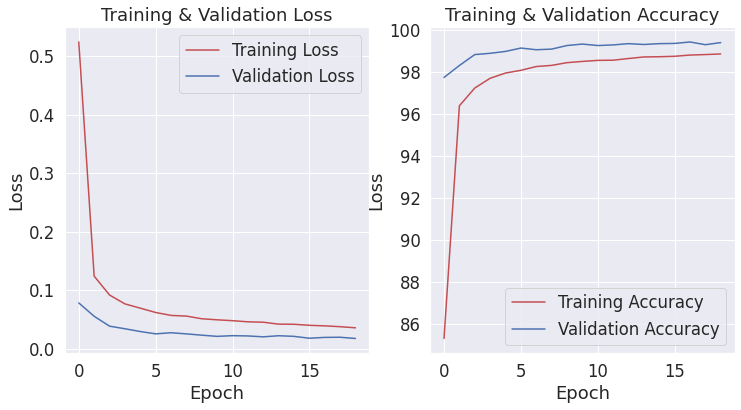

In [27]:
sns.set(style='whitegrid')
# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(np.array(train_loss_values), 'r', label="Training Loss")
ax1.plot(np.array(test_loss_values), 'b', label="Validation Loss")

# Label the plot.
ax1.set_title("Training & Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(np.array(train_accuracy_values), 'r', label="Training Accuracy")
ax2.plot(np.array(test_accuracy_values), 'b', label="Validation Accuracy")

# Label the plot.
ax2.set_title("Training & Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()

plt.show()